In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()
import sys
sys.path.append('..')

In [2]:
# Load the historical price data for the selected tickers
# Define the sector of interest
sector = 'Banks'
directory = 'data_vn_20230228/stock-historical-data/'
# Load the ticket overview dataset
ticker_overview = pd.read_csv('data_vn_20230228/ticker-overview.csv')
# Select the tickers for companies in the sector of interest
tickers = ticker_overview.loc[ticker_overview['industryEn'] == sector, 'ticker'].tolist() 

In [3]:
# Load the historical price data for the selected tickers
path = []  # List to store individual DataFrames
stock = []
for ticker in tickers:
    exchange = ticker_overview.loc[ticker_overview['ticker'] == ticker, 'exchange'].iloc[0]
    
    if exchange == 'HOSE':
        temp = os.path.join('data_vn_20230228/stock-historical-data', ticker + '-VNINDEX-History.csv')
        path.append(temp)
        stock.append(ticker)
            
    elif exchange == 'HNX':
        temp = os.path.join('data_vn_20230228/stock-historical-data', ticker + '-' + exchange + 'Index' + '-History.csv')
        path.append(temp)
        stock.append(ticker)
    else:
        continue

In [4]:
dfs = [pd.read_csv(p)[['TradingDate', 'Close']] for p in path]

In [5]:
len(dfs)

19

In [6]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='TradingDate'), dfs).iloc[:, 1:]
data.head()

/var/folders/tt/ldm2rsns0fb1tkl1411f3_g00000gn/T/ipykernel_6704/426529206.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='TradingDate'), dfs).iloc[:, 1:]
/var/folders/tt/ldm2rsns0fb1tkl1411f3_g00000gn/T/ipykernel_6704/426529206.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='TradingDate'), dfs).iloc[:, 1:]
/var/folders/tt/ldm2rsns0fb1tkl1411f3_g00000gn/T/ipykernel_6704/426529206.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='TradingDate'), dfs).iloc[:, 1:]
/var/folders/tt/ldm2rsns0fb1

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close
0,20768.0,33357.0,29495.0,15416.0,16320.0,11233.0,17035.0,13017.0,25869.0,11583.0,19080.0,13588.0,11509.0,18400.0,39300.0,17990.0,73317.0,22175.0,16335.0
1,20512.0,33437.0,29798.0,15833.0,16384.0,11198.0,17005.0,12869.0,25781.0,11583.0,18840.0,14532.0,11381.0,18750.0,39350.0,17956.0,73626.0,21821.0,16021.0
2,20768.0,33318.0,29533.0,15833.0,16480.0,11058.0,16974.0,12869.0,25433.0,11662.0,18840.0,15543.0,12468.0,18950.0,39400.0,17823.0,73472.0,21897.0,16076.0
3,21120.0,33674.0,30251.0,15749.0,16640.0,11514.0,17437.0,12810.0,25520.0,11982.0,19160.0,16622.0,13683.0,19200.0,39550.0,18290.0,73781.0,22251.0,16484.0
4,21312.0,33911.0,30554.0,16249.0,16768.0,12146.0,17467.0,12810.0,25346.0,12142.0,19280.0,17769.0,15026.0,20500.0,40050.0,18557.0,73394.0,23491.0,16650.0


In [7]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [8]:
mean_daily_returns * 252 # 252 trading days in a year.

Close_x    0.141390
Close_y    0.222112
Close_x    0.039199
Close_y    0.196140
Close_x    0.086955
Close_y    0.231675
Close_x    0.077204
Close_y    0.029781
Close_x   -0.283400
Close_y    0.312642
Close_x   -0.012840
Close_y    0.493410
Close_x    0.035762
Close_y    0.245689
Close_x   -0.132188
Close_y    0.162655
Close_x    0.167814
Close_y    0.041862
Close      0.091819
dtype: float64

In [9]:
volatilities * 252 # 252 trading days in a year.

Close_x    5.342224
Close_y    6.156959
Close_x    6.266132
Close_y    7.618056
Close_x    5.682727
Close_y    7.713064
Close_x    5.957657
Close_y    5.948420
Close_x    4.669805
Close_y    8.707503
Close_x    6.001717
Close_y    4.878787
Close_x    7.826557
Close_y    7.496155
Close_x    6.141594
Close_y    6.402337
Close_x    4.488694
Close_y    6.425960
Close      5.903435
dtype: float64

In [10]:
combine = pd.DataFrame({'returns': mean_daily_returns * 252,
                       'volatility': volatilities * 252})

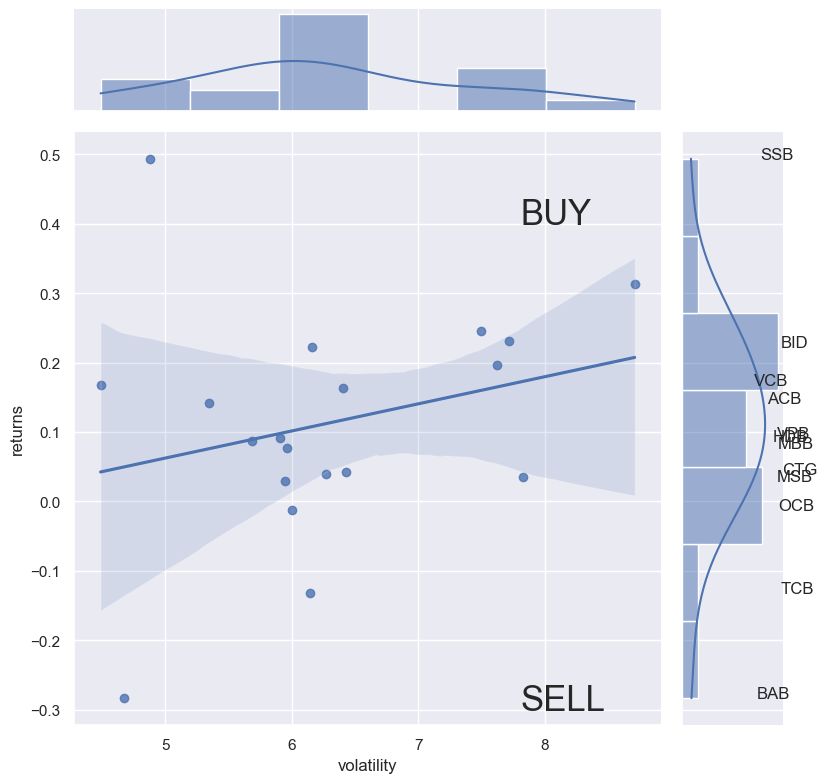

In [27]:
combine = combine.reset_index(drop=True)
g = sns.jointplot(x='volatility', y='returns', data=combine, kind='reg', height=8)

for i in range(combine.shape[0]):
    plt.annotate(stock[i], (combine.iloc[i]['volatility'], combine.iloc[i]['returns']))
plt.text(-10, -0.3, 'SELL', fontsize=25)
plt.text(-10, 0.4, 'BUY', fontsize=25)
plt.show()


In [29]:
combine['Stock'] = stock
combine

,returns,volatility,Stock
0,0.141390,5.342224,ACB
1,0.222112,6.156959,BID
2,0.039199,6.266132,CTG
3,0.196140,7.618056,EIB
4,0.086955,5.682727,HDB
5,0.231675,7.713064,LPB
6,0.077204,5.957657,MBB
7,0.029781,5.948420,MSB
8,-0.283400,4.669805,BAB
9,0.312642,8.707503,NVB


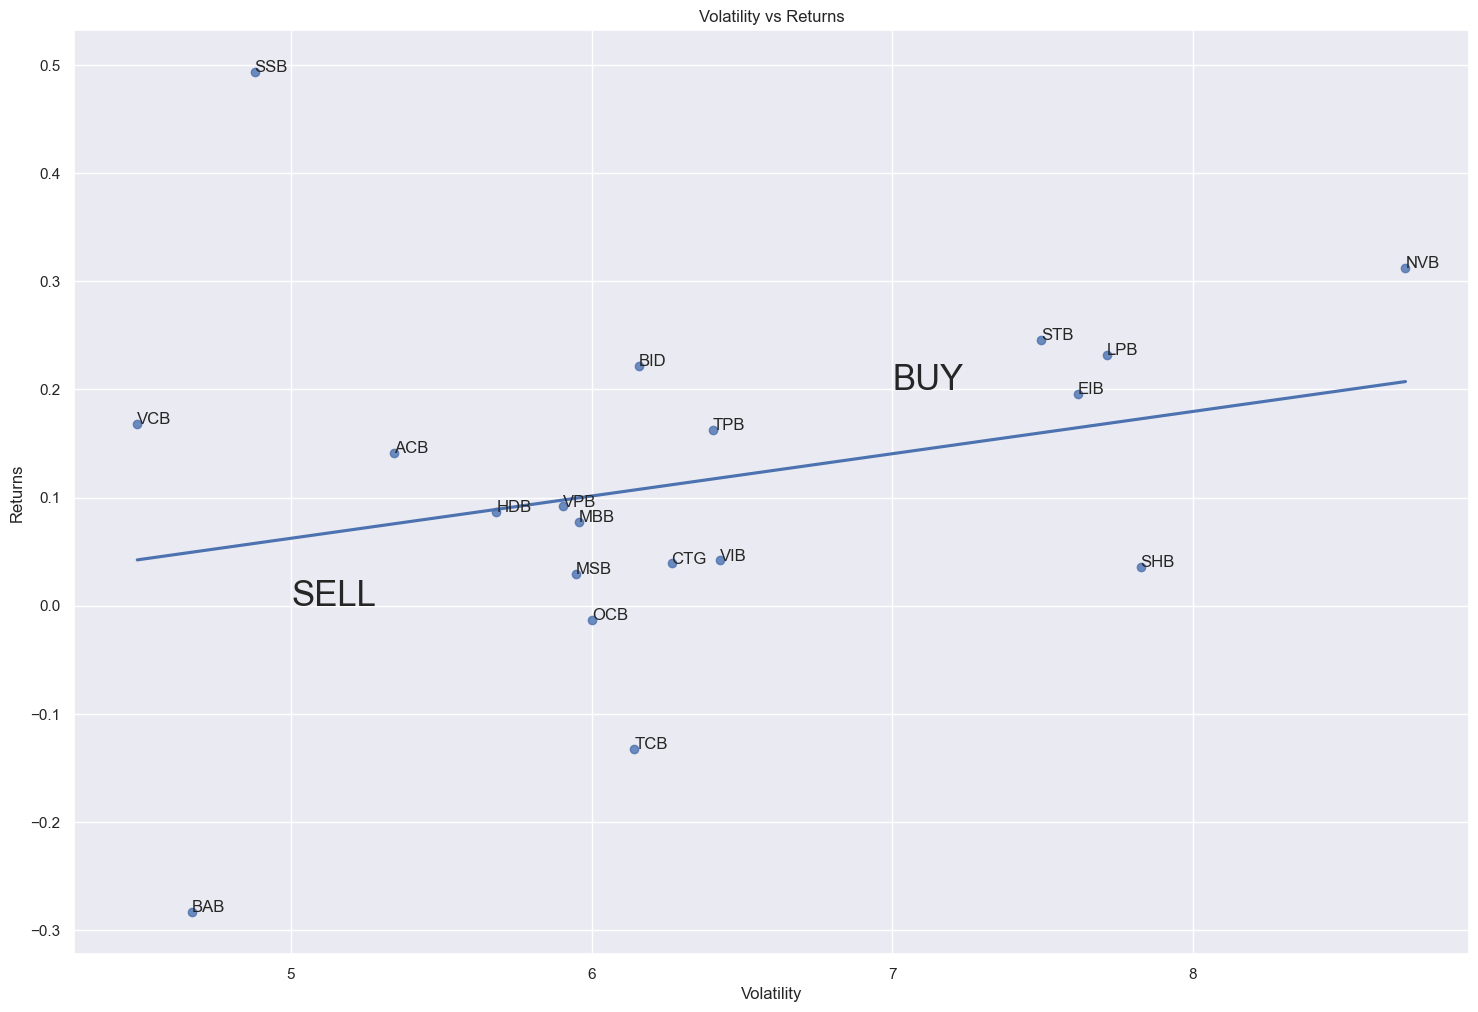

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)

# plt.scatter(combine['volatility'], combine['returns'])
sns.regplot(x='volatility', y='returns', data=combine, scatter=True, ci=None)

for i in range(combine.shape[0]):
    plt.annotate(combine['Stock'][i], (combine['volatility'][i], combine['returns'][i]))
plt.text(5, 0, 'SELL', fontsize=25)
plt.text(7, 0.2, 'BUY', fontsize=25)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Volatility vs Returns')
plt.savefig('scatter_plot.png')  # Export the plot to a file


plt.show()